In [39]:
# Classification model to detect images as "Happy person" or "Sad person"
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [40]:
# cleaning the data
dataDir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for data_file in os.listdir(dataDir): 
    for image in os.listdir(os.path.join(dataDir, data_file)):
        image_path = os.path.join(dataDir, data_file, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                # print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [41]:
#loading data
data = tf.keras.utils.image_dataset_from_directory("data")  # using keras utils to load data
type(data) # not in memory
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next() # batch is of length 2
# 1 is the arrays and 2 is the label (the classes we have)

Found 241 files belonging to 2 classes.


In [42]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000023110FA3C10>)

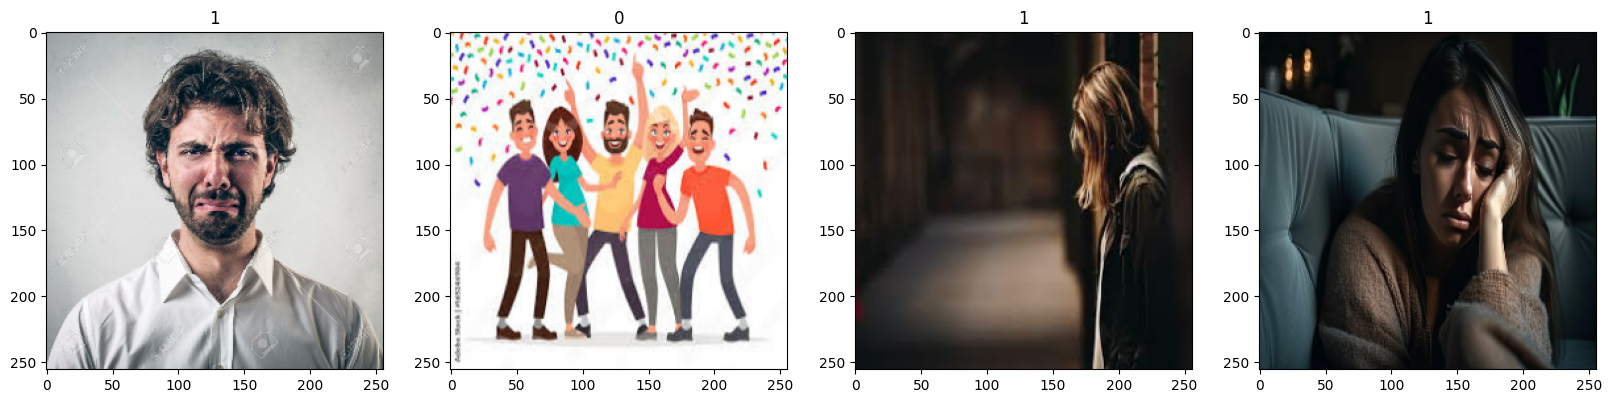

In [43]:
#Script to figure out which label is happy and which one is sad
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#after running
#Class: 1 = Sad
#Class: 0 = Happy

In [44]:
data = data.map(lambda x,y: (x/255, y))
data_iterator = data.as_numpy_iterator()

In [45]:
# Normalizing data
batch = data_iterator.next() # numbers between 0 and 1 for faster computations


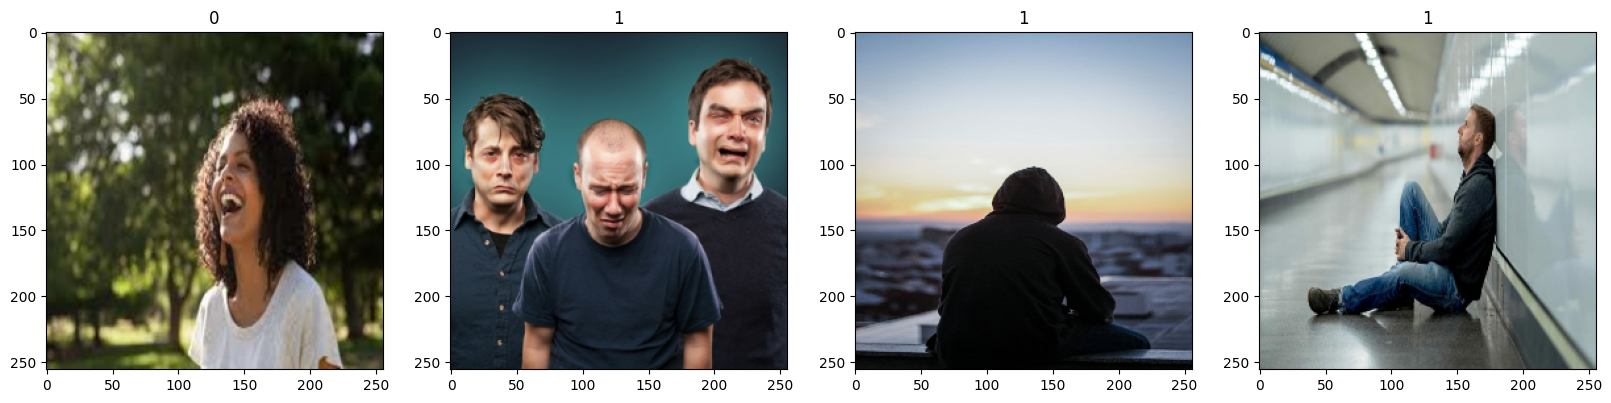

In [46]:
# removed asInt because of rescaling
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [47]:
#Switch up numbers depending on no of batches
trainDataSize = int(len(data) * 0.7)
validateDataSize  = int(len(data) * 0.2) + 1
testDataSize  = int(len(data) * 0.1) + 1

In [48]:
# Should give true at the end
trainDataSize + validateDataSize + testDataSize == len(data)

True

In [79]:
trainData = data.take(trainDataSize)
validateData = data.skip(trainDataSize).take(validateDataSize)
testData = data.skip(trainDataSize + validateDataSize).take(testDataSize)

In [50]:
#model
model = Sequential([
    Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),

    Conv2D(32, (3,3), 1, activation='relu'),
    MaxPooling2D(),

    Conv2D(16, (3,3), 1, activation='relu'),
    MaxPooling2D(),

    Flatten(),

    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [51]:
#compile
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
logDir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

In [53]:
hist = model.fit(trainData, epochs=20, validation_data=validateData, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 601ms/step - accuracy: 0.5960 - loss: 1.1327 - val_accuracy: 0.4844 - val_loss: 0.6901
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 664ms/step - accuracy: 0.5132 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6219
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 616ms/step - accuracy: 0.7223 - loss: 0.5880 - val_accuracy: 0.8125 - val_loss: 0.4985
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 568ms/step - accuracy: 0.8151 - loss: 0.4871 - val_accuracy: 0.9219 - val_loss: 0.3684
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.8639 - loss: 0.3591 - val_accuracy: 0.9219 - val_loss: 0.2985
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.8852 - loss: 0.3102 - val_accuracy: 0.9375 - val_loss: 0.2214
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 613ms/step - accuracy: 0.9573 - loss: 0.1757 - val_accuracy: 0.9219 - val_loss: 0.1769
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 608ms/step - accuracy: 0.9643 - loss: 0.1350 - val_accuracy: 0.9688 - val_loss:

In [54]:
# can plot performance using hist.history

In [86]:
def roundYHat(yhat):
    if yhat > 0.5: 
        return 'Prediction: Sad Person'
    return 'Prediction: Happy Person'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


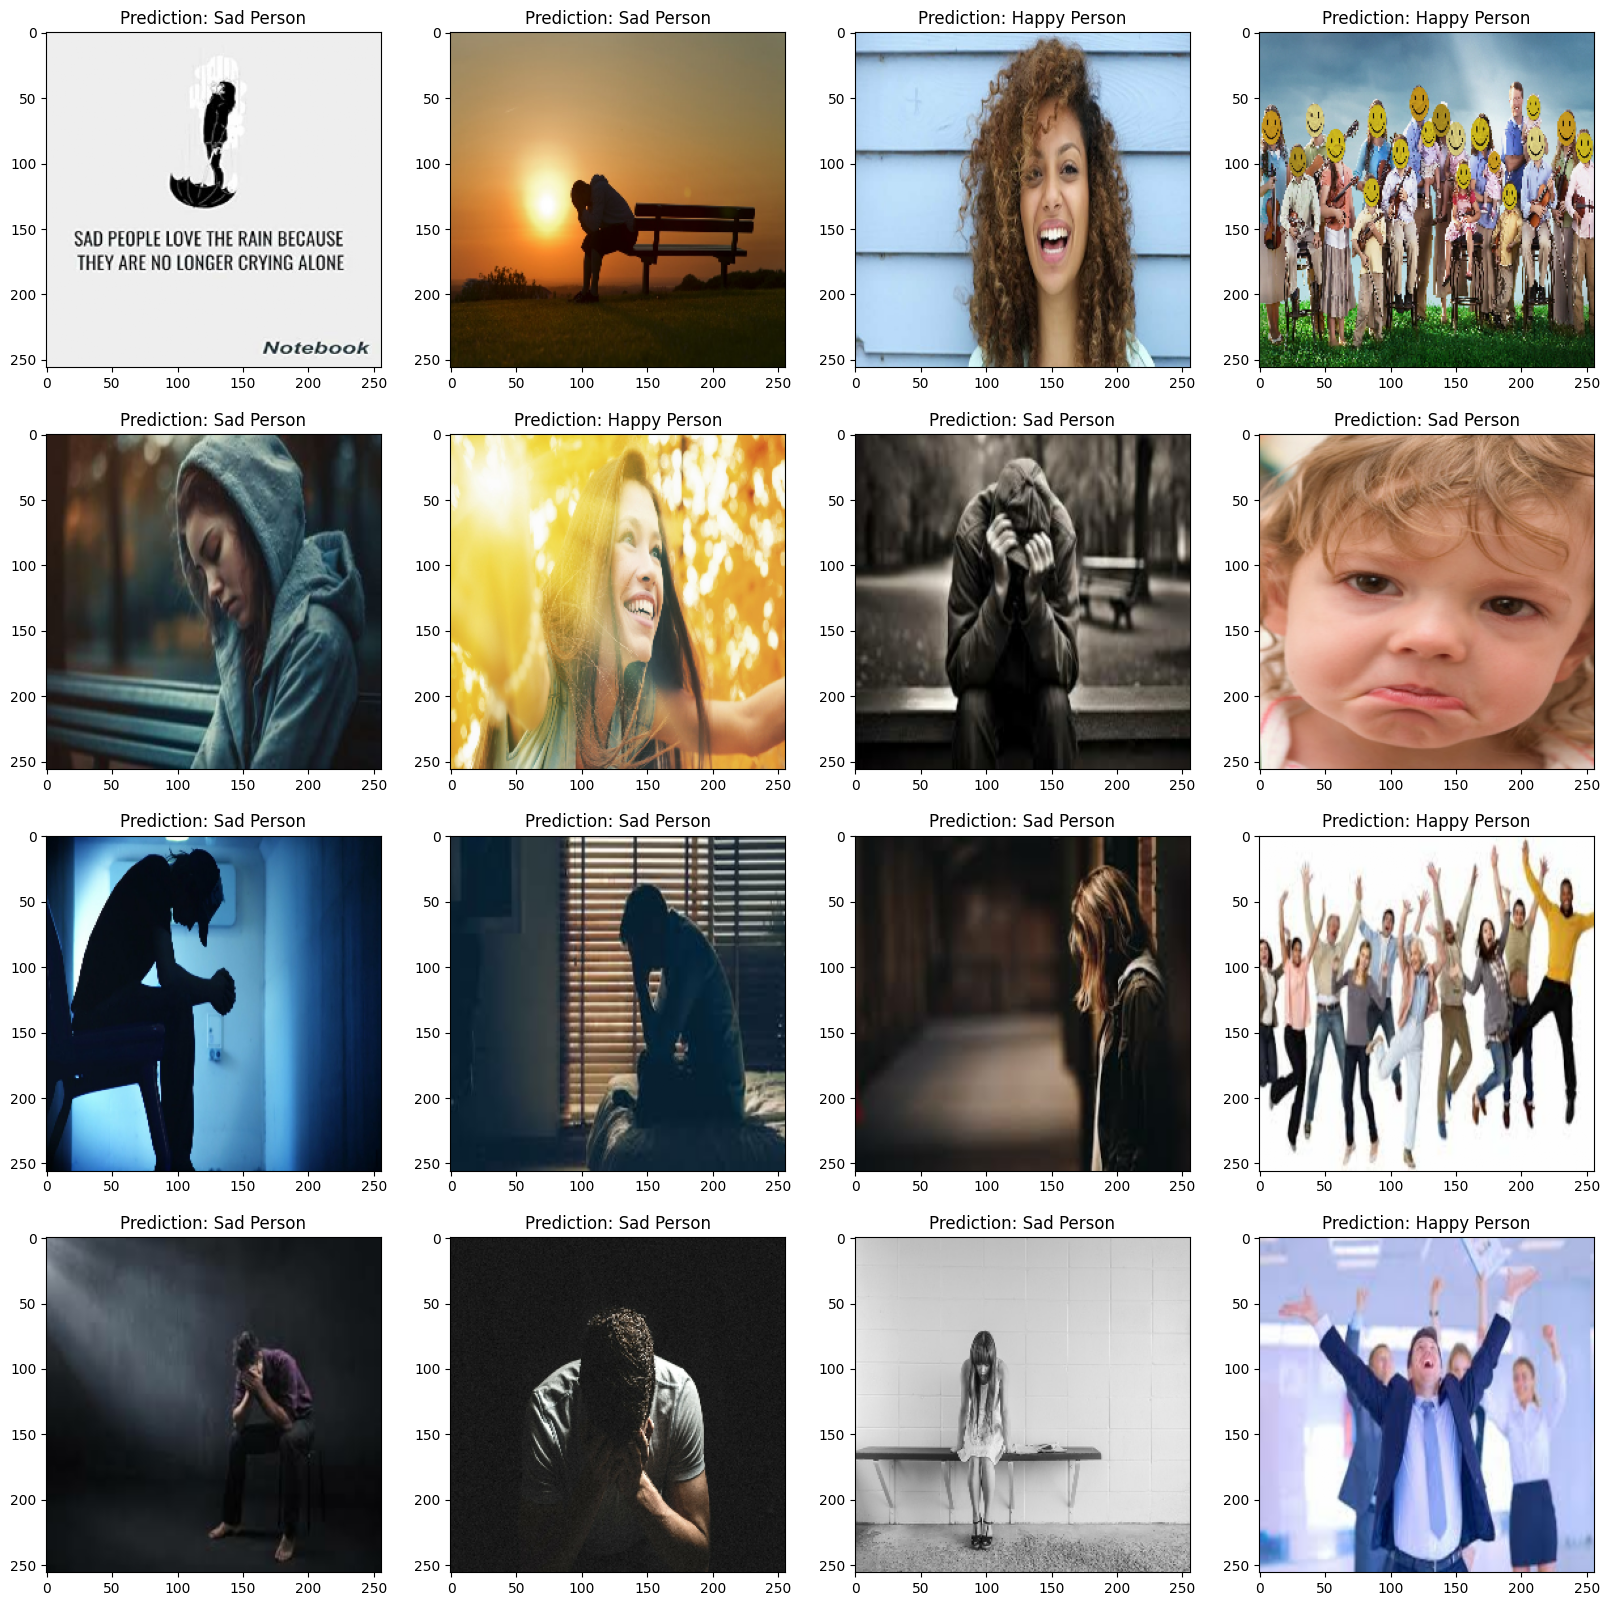

In [89]:
#Testing
for batch in testData.as_numpy_iterator(): #only 1 batch in my case
    X, y = batch
    yhat = model.predict(X)
    fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
    for idx, img in enumerate(batch[0][:16]):
        axs[idx//4,idx%4].imshow(img)
        axs[idx//4,idx%4].title.set_text(roundYHat(yhat[idx]))